In [ ]:
# Install pyspark
!pip install pyspark

In [ ]:
# Import SparkSession
from pyspark.sql import SparkSession# Create a Spark Session
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Check Spark Session Information
spark

In [ ]:
import matplotlib.pyplot as plt
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import time
import numpy as np
from pyspark.sql import functions as fn
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pyspark.sql.window import Window
from pyspark.sql.functions import lit
from pyspark.sql import SQLContext as sqlContext
from pyspark.ml.feature import RegexTokenizer,StopWordsRemover,CountVectorizer
import pandas as pd
import time
import numpy as np
from pyspark.sql.types import *
from pyspark.ml import feature, regression, evaluation, Pipeline
from pyspark.ml.feature import MinMaxScaler, StandardScaler
from pyspark.sql import functions as fn, Row, Column as col
from pyspark.sql.functions import length, regexp_replace

DATA processing

reading stock prices

In [ ]:
AAPL_stocks = pd.read_csv('AAPL_stocks.csv')
MSFT_stocks = pd.read_csv('MSFT_stocks.csv')
IBM_stocks = pd.read_csv('IBM_stocks.csv')

In [ ]:
AAPL_stocks = AAPL_stocks[['date','open','close']].astype(str)
AAPL_stocks["Company"] = "AAPL"
MSFT_stocks = MSFT_stocks[['date','open','close']].astype(str)
MSFT_stocks["Company"] = "MSFT"
IBM_stocks = IBM_stocks[['date','open','close']].astype(str)
IBM_stocks["Company"] = "IBM"

In [ ]:
frames = [AAPL_stocks, MSFT_stocks, IBM_stocks]
stocks_dataframe = pd.concat(frames, sort=False)
stocks_spark_df = spark.createDataFrame(stocks_dataframe)

In [ ]:
stocks_spark_df = stocks_spark_df.withColumn("close", stocks_spark_df["close"].cast("double"))
stocks_spark_df = stocks_spark_df.withColumn("date", stocks_spark_df["date"].cast("date"))

Visualising apples closing dates

In [ ]:
stocks_spark_df_AAPL = stocks_spark_df.where("Company == 'AAPL'")

# Convert the Spark DataFrame to Pandas DataFrame
df_aapl_pandas = stocks_spark_df_AAPL.toPandas()

In [ ]:
# Create an interactive plot using Plotly
fig = px.line(df_aapl_pandas, x='date', y='close', title='Date vs. Closing Price for AAPL')
fig.show()

Visualing microsoft closing date

In [ ]:
stocks_spark_df_AAPL = stocks_spark_df.where("Company == 'MSFT'")

# Convert the Spark DataFrame to Pandas DataFrame
df_aapl_pandas = stocks_spark_df_AAPL.toPandas()

In [ ]:
# Create an interactive plot using Plotly
fig = px.line(df_aapl_pandas, x='date', y='close', title='Date vs. Closing Price for MSFT')
fig.show()

Visualising IBM clsoing dates

In [ ]:
stocks_spark_df_AAPL = stocks_spark_df.where("Company == 'IBM'")
# Convert the Spark DataFrame to Pandas DataFrame
df_aapl_pandas = stocks_spark_df_AAPL.toPandas()

In [ ]:
# Create an interactive plot using Plotly
fig = px.line(df_aapl_pandas, x='date', y='close', title='Date vs. Closing Price for IBM')
fig.show()

all the plots together

In [ ]:
stocks_spark_df_AAPL = stocks_spark_df.where("Company == 'AAPL'").toPandas()
stocks_spark_df_MSFT = stocks_spark_df.where("Company == 'MSFT'").toPandas()
stocks_spark_df_IBM = stocks_spark_df.where("Company == 'IBM'").toPandas()

In [ ]:
stocks_spark_df_AAPL['Company'] = 'AAPL'
stocks_spark_df_MSFT['Company'] = 'MSFT'
stocks_spark_df_IBM['Company'] = 'IBM'

# Combine the DataFrames into a single DataFrame
combined_df = pd.concat([stocks_spark_df_AAPL, stocks_spark_df_MSFT, stocks_spark_df_IBM])

# Create an interactive plot for Date vs. close for AAPL, MSFT, and IBM using Plotly
fig = px.line(combined_df, x='date', y='close', color='Company', title='Date vs. closing for Multiple Companies')

# Show the interactive plot
fig.show()

Daily return acrosss all the stocks

calculating daily return using the formula :

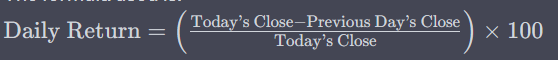

In [ ]:
stocks_spark_df = stocks_spark_df.withColumn('Previous Close', fn.lag(stocks_spark_df['Close']).over(Window.partitionBy('Company').orderBy('Date')))
stocks_spark_df = stocks_spark_df.withColumn('Daily Return', ((stocks_spark_df['Close'] - stocks_spark_df['Previous Close'])/stocks_spark_df['Close']) * 100 )
stocks_spark_df = stocks_spark_df.select("Company", "Date", "Close","Daily Return")

In [ ]:
stocks_spark_df = stocks_spark_df.withColumn("Daily Return", stocks_spark_df["Daily Return"].cast("double"))
stocks_spark_df = stocks_spark_df.withColumn("date", stocks_spark_df["date"].cast("date"))

visualizing apple's daily return across dates




In [ ]:
stocks_spark_df_AAPL = stocks_spark_df.where("Company == 'AAPL'")
# Convert the Spark DataFrame to a Pandas DataFrame
df_aapl_pandas = stocks_spark_df_AAPL.toPandas()

In [ ]:
# Create an interactive plot for Date vs. Daily Return using Plotly
fig = px.line(df_aapl_pandas, x='date', y='Daily Return', title='Date vs. Daily Return for AAPL')
fig.show()

visualizing microsoft's daily return across dates

In [ ]:
stocks_spark_df_AAPL = stocks_spark_df.where("Company == 'MSFT'")
# Convert the Spark DataFrame to a Pandas DataFrame
df_aapl_pandas = stocks_spark_df_AAPL.toPandas()

In [ ]:
# Create an interactive plot for Date vs. Daily Return using Plotly
fig = px.line(df_aapl_pandas, x='date', y='Daily Return', title='Date vs. Daily Return for MSFT')
fig.show()

visualizing microsoft's daily return across dates

In [ ]:
stocks_spark_df_AAPL = stocks_spark_df.where("Company == 'IBM'")
# Convert the Spark DataFrame to a Pandas DataFrame
df_aapl_pandas = stocks_spark_df_AAPL.toPandas()

In [ ]:
# Create an interactive plot for Date vs. Daily Return using Plotly
fig = px.line(df_aapl_pandas, x='date', y='Daily Return', title='Date vs. Daily Return for IBM')
fig.show()

In [ ]:
stocks_spark_df_AAPL = stocks_spark_df.where("Company == 'AAPL'").toPandas()
stocks_spark_df_MSFT = stocks_spark_df.where("Company == 'MSFT'").toPandas()
stocks_spark_df_IBM = stocks_spark_df.where("Company == 'IBM'").toPandas()

In [ ]:
stocks_spark_df_AAPL['Company'] = 'AAPL'
stocks_spark_df_MSFT['Company'] = 'MSFT'
stocks_spark_df_IBM['Company'] = 'IBM'

# Combine the DataFrames into a single DataFrame
combined_df = pd.concat([stocks_spark_df_AAPL, stocks_spark_df_MSFT, stocks_spark_df_IBM])

# Create an interactive plot for Date vs. Daily Return for AAPL, MSFT, and IBM using Plotly
fig = px.line(combined_df, x='date', y='Daily Return', color='Company', title='Date vs. Daily Return for Multiple Companies')

# Show the interactive plot
fig.show()

# Combining news with stock prices

In [ ]:
AAPL_news = pd.read_csv('AAPL_news.csv')
MSFT_news = pd.read_csv('MSFT_news.csv')
IBM_news = pd.read_csv('IBM_news.csv')

In [ ]:
AAPL_news = AAPL_news[['publication_date','title','summary']].astype(str)
AAPL_news["Company"] = "AAPL"
MSFT_news = MSFT_news[['publication_date','title','summary']].astype(str)
MSFT_news["Company"] = "MSFT"
IBM_news = IBM_news[['publication_date','title','summary']].astype(str)
IBM_news["Company"] = "IBM"

frames = [AAPL_news, MSFT_news, IBM_news]
news_dataframe = pd.concat(frames, sort=False)
news_spark_df = spark.createDataFrame(news_dataframe)


news_spark_df = news_spark_df.withColumn('summary', regexp_replace('summary', '&apos;', "'"))
news_spark_df = news_spark_df.withColumn('title', regexp_replace('title', '&apos;', "'"))

news_spark_df = news_spark_df.withColumn('all_text', fn.concat(fn.col('title'),fn.lit(' '), fn.col('summary')))

In [ ]:
news_spark_df = news_spark_df.withColumn('Date', news_spark_df['publication_date'].substr(1, 10))
news_spark_df = news_spark_df.drop('publication_date')
news_spark_df = news_spark_df.distinct()
news_spark_df = news_spark_df.sort('Date', ascending= False)
regex = "([0-9]{4}-[0-9]{2}-[0-9]{2})"
news_spark_df = news_spark_df.where(fn.col("Date").rlike(regex))

(Today's news with tommorow price)

In [ ]:
news_spark_df = news_spark_df.withColumn('Next_Date', fn.date_add(news_spark_df['Date'], 1))

In [ ]:
news_spark_df.show(2)

+--------------------+--------------------+-------+--------------------+----------+----------+
|               title|             summary|Company|            all_text|      Date| Next_Date|
+--------------------+--------------------+-------+--------------------+----------+----------+
|Sony's PlayStatio...|The first details...|   MSFT|Sony's PlayStatio...|2019-04-18|2019-04-19|
|Explainer: How 5G...|By Stephen Nellis...|   AAPL|Explainer: How 5G...|2019-04-18|2019-04-19|
+--------------------+--------------------+-------+--------------------+----------+----------+
only showing top 2 rows



In [ ]:
combined_data = news_spark_df.join(stocks_spark_df, (news_spark_df.Next_Date == stocks_spark_df.date) & (news_spark_df.Company == stocks_spark_df.Company))
combined_data = combined_data.drop(news_spark_df.Date)
combined_data = combined_data.drop(stocks_spark_df.Company)
combined_data = combined_data.drop(stocks_spark_df.Close)
combined_data = combined_data.drop(news_spark_df.Next_Date)
combined_data = combined_data.select("date","company","all_text","Daily Return",
                                     fn.when(combined_data['Daily Return']>0, 1).\
                                     otherwise(0).alias("Return_Binary"))

combined_data = combined_data.groupby("date", "company", "Daily Return","Return_Binary").\
agg(fn.concat_ws(", ", fn.collect_list(combined_data.all_text)).alias("combined_text"))

combined_data.show(10)

+----------+-------+--------------------+-------------+--------------------+
|      date|company|        Daily Return|Return_Binary|       combined_text|
+----------+-------+--------------------+-------------+--------------------+
|2018-11-21|   AAPL|                NULL|            0|Bearish momentum ...|
|2018-11-21|    IBM|                NULL|            0|IBM (IBM) Stock M...|
|2018-11-23|   AAPL| -2.6060711590922336|            0|Apple (AAPL) Stoc...|
|2018-11-23|    IBM| -1.1775748784025901|            0|Why HP Inc. Could...|
|2018-11-23|   MSFT|-0.03880857669545576|            0|Salesforce (CRM) ...|
|2018-11-26|   AAPL|  1.3343259649524752|            1|Could Apple Be a ...|
|2018-11-26|   MSFT|   3.193387808772429|            1|Stock Market Powe...|
|2018-11-27|   MSFT|  0.6253500093335839|            1|[$$] Microsoft: W...|
|2018-11-28|   AAPL|   3.702884934232336|            1|Trump says he exp...|
|2018-11-28|   MSFT|    3.58171346292297|            1|Possible China Im...|

implementing tokenization, count vectoring and TF-IDF

In [ ]:
from pyspark.ml.feature import IDF
import requests

regexTokenizer = RegexTokenizer(inputCol="combined_text", outputCol="words", pattern="\\W")
stop_words = requests.get('http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words').text.split()
sw_filter = StopWordsRemover()\
  .setStopWords(stop_words)\
  .setCaseSensitive(False)\
  .setInputCol("words")\
  .setOutputCol("filtered")

cv = CountVectorizer(minTF=1., minDF=1., vocabSize=2**16)\
  .setInputCol("filtered")\
  .setOutputCol("tf")

idf = IDF().\
    setInputCol('tf').\
    setOutputCol('tfidf')

idf_pipeline = Pipeline(stages=[regexTokenizer,sw_filter, cv,idf])

# **linear regression to predict daily return using TF-IDF output**

when 60% , 30% , 10 %

In [ ]:

combined_data = combined_data.na.fill(0)
training_df, validation_df, testing_df = combined_data.randomSplit([0.6, 0.3, 0.1], seed=100 )

linearRegression = regression.LinearRegression(featuresCol = 'tfidf', labelCol = 'Daily Return')
pipe_model_best =  Pipeline(stages=[regexTokenizer,sw_filter, cv,idf, linearRegression])
linear_tfidf_pipeline = pipe_model_best.fit(training_df)

pipe_model =  Pipeline(stages=[regexTokenizer,sw_filter, cv,idf]).fit(training_df)

In [ ]:
data = pipe_model.transform(validation_df)
lr1=linearRegression.fit(data)

predictions = linear_tfidf_pipeline.transform(validation_df)
rmse = fn.sqrt(fn.mean((fn.col('Daily Return') - fn.col('prediction'))**2)).alias('rmse')
rmse1_df = linear_tfidf_pipeline.transform(validation_df).select(rmse)
rmse1_df.show()

+------------------+
|              rmse|
+------------------+
|2.5754937014224155|
+------------------+



In [ ]:

# Assuming actual_values and predicted_values are numpy arrays
actual_values = np.array([row['Daily Return'] for row in predictions.select("Daily Return").collect()])
predicted_values = np.array([row['prediction'] for row in predictions.select("prediction").collect()])

# Calculate residuals
residuals = actual_values - predicted_values

# Create a DataFrame to store actual, predicted, and residuals
residual_df = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values, 'Residual': residuals})

# Set a threshold to identify outliers
threshold = 3  # Adjust this value based on your preference

# Identify points with larger residuals
outliers = residual_df[abs(residual_df['Residual']) > threshold]

# Display the identified outliers
print("Points with Larger Residuals:")
print(outliers)

Points with Larger Residuals:
       Actual  Predicted   Residual
6   -0.653218   9.112251  -9.765469
8  -11.062663   0.125763 -11.188426
11  -0.646718   3.495320  -4.142038
15  -2.296151   2.717160  -5.013312
16   7.803446   0.110840   7.692607
17  -0.798952   4.829789  -5.628741
28   0.165718   3.471136  -3.305418
32   3.552207   0.464364   3.087843
43  -4.601279  -1.192295  -3.408984
52   4.444226  -0.864678   5.308905
56  -0.734934   2.699459  -3.434393
58   2.818779  -2.127714   4.946494
64   6.396369  -0.708688   7.105058


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Actual Values')

Text(0, 0.5, 'Predicted Values')

Text(0.5, 1.0, 'Actual vs. Predicted Values with Outliers')

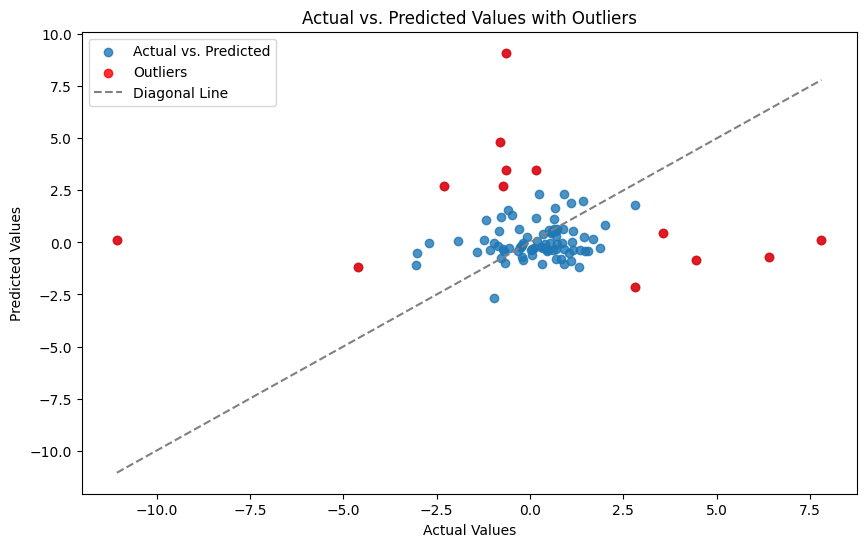

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(residual_df['Actual'], residual_df['Predicted'], label='Actual vs. Predicted', alpha=0.8)

# Scatter plot of identified outliers
plt.scatter(outliers['Actual'], outliers['Predicted'], color='red', label='Outliers', alpha=0.8)

# Plot the diagonal line for reference
plt.plot([min(residual_df['Actual']), max(residual_df['Actual'])], [min(residual_df['Actual']), max(residual_df['Actual'])], linestyle='--', color='gray', label='Diagonal Line')

# Set plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values with Outliers')

# Add legend
plt.legend()

# Display the plot
plt.show()


when 50%, 40%, 10%

In [ ]:
combined_data = combined_data.na.fill(0)
training_df, validation_df, testing_df = combined_data.randomSplit([0.5, 0.4, 0.1], seed=100 )

linearRegression541 = regression.LinearRegression(featuresCol = 'tfidf', labelCol = 'Daily Return')
pipe_model_best541 =  Pipeline(stages=[regexTokenizer,sw_filter, cv,idf, linearRegression])
linear_tfidf_pipeline541 = pipe_model_best.fit(training_df)

pipe_model541 =  Pipeline(stages=[regexTokenizer,sw_filter, cv,idf]).fit(training_df)


In [ ]:
data = pipe_model.transform(validation_df)
lr1_541=linearRegression.fit(data)

predictions541 = linear_tfidf_pipeline.transform(validation_df)
rmse = fn.sqrt(fn.mean((fn.col('Daily Return') - fn.col('prediction'))**2)).alias('rmse')
rmse1_df = linear_tfidf_pipeline.transform(validation_df).select(rmse)
rmse1_df.show()

+-----------------+
|             rmse|
+-----------------+
|2.248651179384942|
+-----------------+



In [ ]:
actual_values = np.array([row['Daily Return'] for row in predictions541.select("Daily Return").collect()])
predicted_values = np.array([row['prediction'] for row in predictions541.select("prediction").collect()])
company_column = np.array([row['Company'] for row in predictions541.select("Company").collect()])

# Calculate residuals
residuals = actual_values - predicted_values

# Create a DataFrame to store actual, predicted, and residuals
residual_df = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values, 'Residual': residuals, 'Company': company_column})

# Set a threshold to identify outliers
threshold = 3  # Adjust this value based on your preference

# Identify points with larger residuals
outliers541 = residual_df[abs(residual_df['Residual']) > threshold]

# Display the identified outliers
print("Points with Larger Residuals:")
print(outliers541)

Points with Larger Residuals:
       Actual  Predicted   Residual Company
9   -0.653218   9.112251  -9.765469    AAPL
12 -11.062663   0.125763 -11.188426    AAPL
16  -0.646718   3.495320  -4.142038    MSFT
20  -2.296151   2.717160  -5.013312    AAPL
21   7.803446   0.110840   7.692607     IBM
22  -0.798952   4.829789  -5.628741    AAPL
39   0.165718   3.471136  -3.305418     IBM
43   3.552207   0.464364   3.087843    AAPL
60  -4.601279  -1.192295  -3.408984    AAPL
72   4.444226  -0.864678   5.308905    MSFT
78  -0.734934   2.699459  -3.434393    MSFT
80   2.818779  -2.127714   4.946494    MSFT
87   6.396369  -0.708688   7.105058    AAPL


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Actual Values')

Text(0, 0.5, 'Predicted Values')

Text(0.5, 1.0, 'Actual vs. Predicted Values with Outliers')

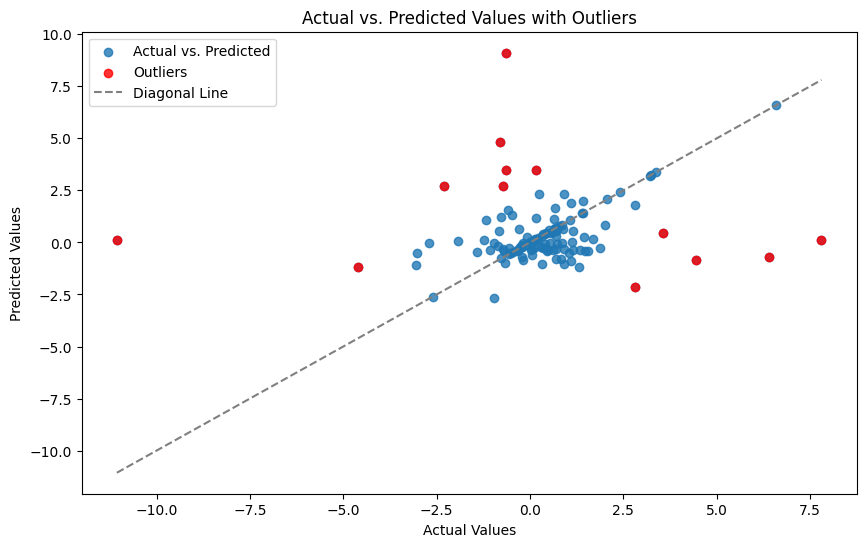

In [ ]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(residual_df['Actual'], residual_df['Predicted'], label='Actual vs. Predicted', alpha=0.8)

# Scatter plot of identified outliers
plt.scatter(outliers541['Actual'], outliers541['Predicted'], color='red', label='Outliers', alpha=0.8)

# Plot the diagonal line for reference
plt.plot([min(residual_df['Actual']), max(residual_df['Actual'])], [min(residual_df['Actual']), max(residual_df['Actual'])], linestyle='--', color='gray', label='Diagonal Line')

# Set plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values with Outliers')

# Add legend
plt.legend()

# Display the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Actual', ylabel='Predicted'>

<Axes: xlabel='Actual', ylabel='Predicted'>

Text(0.5, 0, 'Actual Values')

Text(0, 0.5, 'Predicted Values')

Text(0.5, 1.0, 'Actual vs. Predicted Values with Outliers')

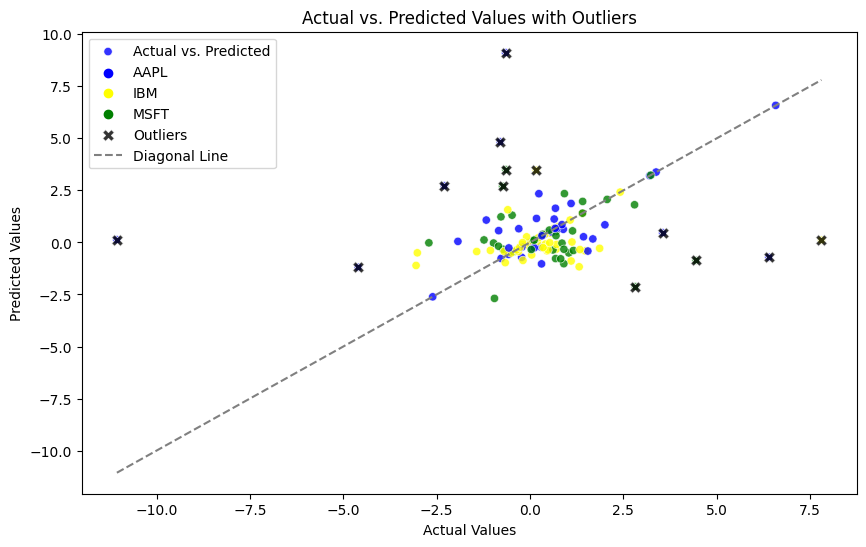

In [ ]:
import seaborn as sns

# Scatter plot of actual vs. predicted values with colored markers for each company
plt.figure(figsize=(10, 6))

# Create a Seaborn scatter plot with hue based on the "Company" column
sns.scatterplot(x='Actual', y='Predicted', hue='Company', data=residual_df, palette={'AAPL': 'blue', 'MSFT': 'green', 'IBM': 'yellow'}, label='Actual vs. Predicted', alpha=0.8)

# Scatter plot of identified outliers with colored markers
sns.scatterplot(x='Actual', y='Predicted', data=outliers541, color='black', label='Outliers', alpha=0.8, marker="X", s=70)

# Plot the diagonal line for reference
plt.plot([min(residual_df['Actual']), max(residual_df['Actual'])], [min(residual_df['Actual']), max(residual_df['Actual'])], linestyle='--', color='gray', label='Diagonal Line')

# Set plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values with Outliers')

# Add legend
plt.legend()

# Display the plot
plt.show()


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import clear_output

# Create a Scatter plot with plotly
fig = px.scatter(residual_df, x='Actual', y='Predicted', color='Company',
                 color_discrete_map={'AAPL': 'blue', 'MSFT': 'green', 'IBM': 'yellow'},
                 labels={'Actual': 'Actual Values', 'Predicted': 'Predicted Values'},
                 title='Actual vs. Predicted Values with Outliers')

fig.update_traces(marker=dict(size=8))

# Add scatter plot for outliers
fig.add_trace(go.Scatter(x=outliers541['Actual'], y=outliers541['Predicted'],
                         mode='markers', marker=dict(color='black', symbol='x', size=10),
                         name='Outliers'))

# Add diagonal line for reference
fig.add_trace(go.Scatter(x=[min(residual_df['Actual']), max(residual_df['Actual'])],
                         y=[min(residual_df['Actual']), max(residual_df['Actual'])],
                         mode='lines', line=dict(color='gray', dash='dash'),
                         name='Diagonal Line'))

# Make the plot interactive
fig.update_layout(
    xaxis=dict(title='Actual Values'),
    yaxis=dict(title='Predicted Values'),
    legend=dict(title='Company'),
    showlegend=True,
    width=1500,
    height=700
)



In [ ]:
fig.show()

In [ ]:
tfidf_output = linear_tfidf_pipeline.transform(validation_df)

tfidf_pandas = tfidf_output.select('combined_text', 'tfidf').toPandas()

tfidf_pandas.head(5)


In [ ]:
# Extract TF stage output
tf_output = tfidf_output.select('combined_text', 'tf').toPandas()

# Display the Pandas DataFrames
print("TF Output:")
tf_output.head(5)

In [ ]:
import numpy as np

# Assuming 'tfidf' is the name of the TF-IDF column
tfidf_vectors = tfidf_output.select('tfidf').rdd.map(lambda x: x[0].toArray())

# Convert the RDD to a NumPy array
tfidf_matrix = np.vstack(tfidf_vectors.collect())

# Display the NumPy array
tfidf_matrix

In [ ]:
import numpy as np

# Assuming lr1 is your trained linear regression model
coefficients = np.array(lr1.coefficients.toArray()[:10])
intercept = lr1.intercept

# Display the coefficients and intercept for the first 10 coefficients
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Construct the linear regression equation for the first 10 coefficients
equation = f"Daily Return = {intercept:.4f} + "
for i, coef in enumerate(coefficients):
    equation += f"({coef:.4f} * tfidf_{i}) + "

# Remove the trailing '+' and display the equation
equation = equation[:-2]
print("Linear Regression Equation (for the first 10 coefficients):")
print(equation)


In [ ]:
import pandas as pd


columns = [f'Term_{i}' for i in range(tfidf_matrix.shape[1])]
index = [f'Document_{i}' for i in range(tfidf_matrix.shape[0])]

# Create a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix, columns=columns, index=index)

# Display the DataFrame
tfidf_df.head(10)


In [ ]:
tfidf_df.shape

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming tfidf_df is the DataFrame obtained from the previous code
# Create a dictionary of terms and TF-IDF values
tfidf_dict = {term: tfidf_df.loc[document, term] for document in tfidf_df.index for term in tfidf_df.columns}

# Sort the dictionary by TF-IDF values in descending order
sorted_tfidf = sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top N terms with highest TF-IDF values
top_n = 10  # Change this value based on how many top terms you want to print
top_terms_list = []
for term, tfidf_value in sorted_tfidf[:top_n]:
    top_terms_list.append((tfidf_value))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of TF-IDF Values')
plt.show()


In [ ]:
top_terms_list

In [ ]:
# Assuming 'search_value' is the value you want to search for in the 'tfidf' column
search_value = 17.249937729157935  # Replace this with the actual value you're searching for

# Search for the value in the 'tfidf' column
matching_rows = tfidf_pandas[tfidf_pandas['tfidf'].apply(lambda x: search_value in x.values)]

# Display the matching rows
print("Rows with the specified value in 'tfidf' column:")
matching_rows


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Convert the PySpark DataFrame to a Pandas DataFrame
tfidf_pandas = tfidf_output.select('combined_text').toPandas()

# Choose a specific row for the word cloud (change the index as needed)
row_index = 12
text = tfidf_pandas.at[row_index, 'combined_text']

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame with a 'combined_text' column
# If you haven't loaded the data yet, replace this part with your actual data loading code
# Example:
# tfidf_output = ...

# Convert the PySpark DataFrame to a Pandas DataFrame
tfidf_pandas = tfidf_output.select('combined_text').toPandas()

# Choose a specific row for the word cloud (change the index as needed)
row_index = 22
text = tfidf_pandas.at[row_index, 'combined_text']

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
predictions_AAPL = predictions.filter(predictions["company"] == "AAPL")

predictions_AAPL.toPandas().plot(x='date', y=['Daily Return', 'prediction'], figsize=(30,10), grid=True)

# Customize grid
plt.grid(True, which='both', linestyle='--', linewidth=1.5, alpha=1)


plt.title('AAPL Daily Return and Prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
predictions_AAPL.select("date", "Daily Return", "prediction")
predictions_AAPL_pd = predictions_AAPL.toPandas()

predictions_AAPL_pd.head(15)


#